In [1]:
import pandas as pd

DATA = '/kaggle/input/nasdaq-analysis/nasdq.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil,year
0,2010-01-04,6.640000,6.810000,6.633333,6.746667,6514500.0,0.11,1.4419,20.04,0.17,0.12,1117.699951,81.510002,2010
1,2010-01-05,6.643333,6.773333,6.643333,6.766667,4445100.0,0.11,1.4402,19.35,0.18,0.12,1118.099976,81.769997,2010
2,2010-01-06,6.733333,6.786667,6.720000,6.763333,7340100.0,0.11,1.4404,19.16,0.19,0.12,1135.900024,83.180000,2010
3,2010-01-07,6.750000,6.766667,6.630000,6.673333,8498400.0,0.11,1.4314,19.06,0.20,0.10,1133.099976,82.660004,2010
4,2010-01-08,6.676667,6.766667,6.626667,6.743333,4347600.0,0.11,1.4357,18.13,0.20,0.11,1138.199951,82.750000,2010


<Axes: xlabel='Date', ylabel='Close'>

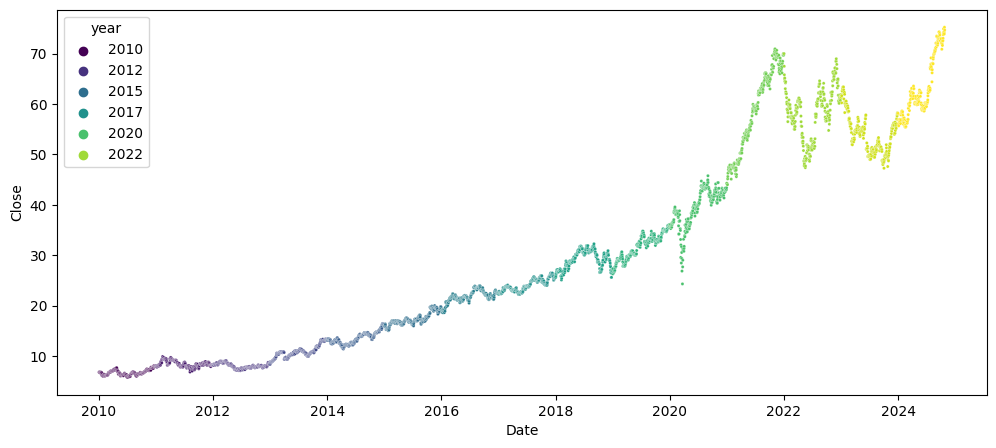

In [2]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', y='Close', hue='year', palette='viridis', s=5)

What do we see? It looks like two very different price regimes: a steady climb up for ten years and then four years of volatility.

<Axes: xlabel='Close', ylabel='Volume'>

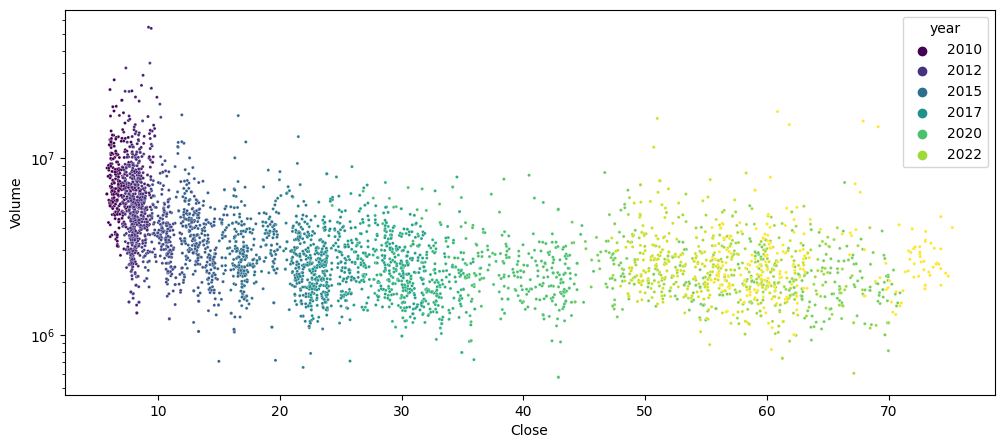

In [3]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='Close', y='Volume', hue='year', palette='viridis', s=5)

If we plot the volume against the price a few big outliers make the volume look almost constant; if we plot the log of the volume we still see some pretty big outliers, but we see a more nuanced story. From the hue we definitely see price retrenchment since 2020. And we see that volume generally has declined as prices have risen.

Let's look at some other quotes; we should expect to see whatever happened in 2020 show up in these plots too. Hint: it was COVID.

<Axes: xlabel='Date', ylabel='InterestRate'>

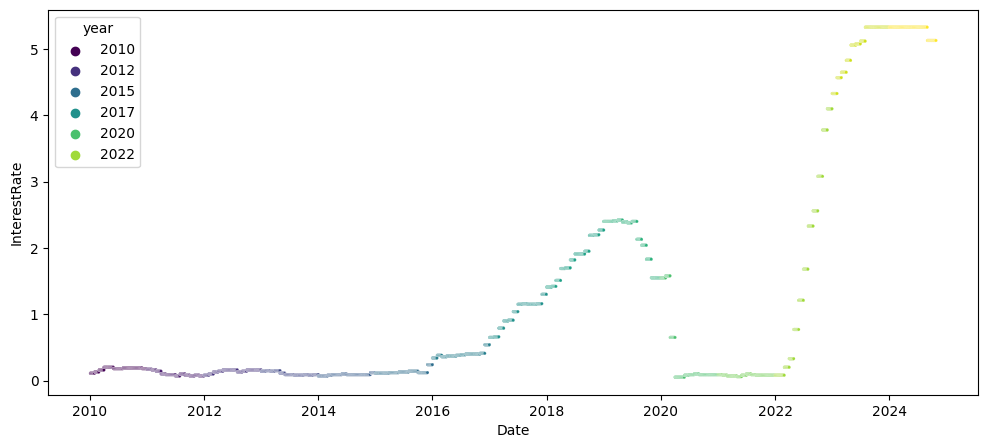

In [4]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', hue='year', palette='viridis', s=5, y='InterestRate')

Here we can see that interest rates were rising prior to the pandemic, due to changes in monetary policy that might have been political or that might have been related to the post-2008 crisis recovery. Then in 2020 rates go to zero again and recover in 2022 in an attempt to respond to inflation.

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'InterestRate',
       'ExchangeRate', 'VIX', 'TEDSpread', 'EFFR', 'Gold', 'Oil', 'year'],
      dtype='object')

<Axes: xlabel='Date', ylabel='ExchangeRate'>

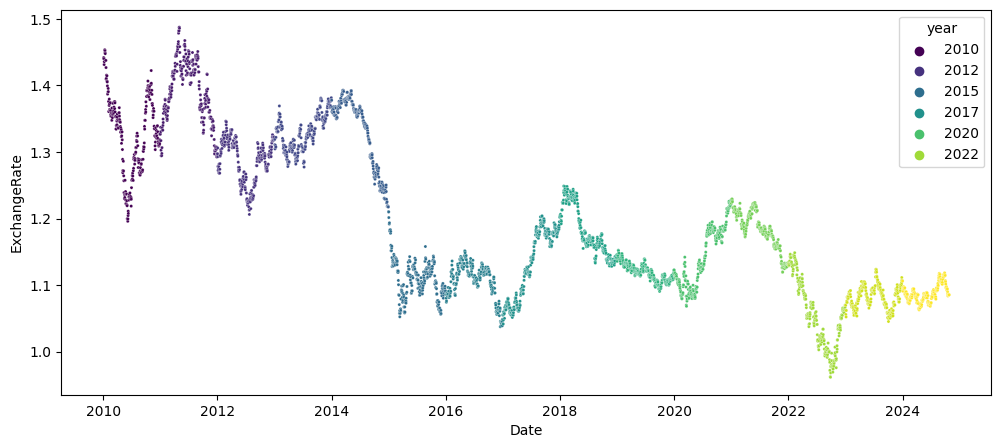

In [6]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', hue='year', palette='viridis', s=5, y='ExchangeRate')

It's not clear which exchange rate this is.